## <h1 align=center>ADVANCE DATA SCIENCE CAPTSONE PROJECT</h1>

In the following Captsone project we will be using the current data we have on COVID-19 of patients worldwide and try to predict how many have recovered recently or will recover in the near future.

## BASIC IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## BASIC INFORMATION ABOUT DATA

In [2]:
df= pd.read_csv(r"C:\Users\Kalpit\Desktop\CCE\Advanced Data Science\covid_19_data.csv")
df.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [4]:
df.shape

(29426, 8)

There are many entries where no Province/State has been defined. So we will drop that column instead of removing those entries because our main focus is on Countries and not all smale scale provinces.

In [5]:
df=df.drop(['Province/State'],axis=1)

In [6]:
df

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29421,29422,05/25/2020,Mexico,2020-05-26 02:32:35,1522.0,123.0,1009.0
29422,29423,05/25/2020,Canada,2020-05-26 02:32:35,11.0,0.0,11.0
29423,29424,05/25/2020,Mainland China,2020-05-26 02:32:35,185.0,2.0,183.0
29424,29425,05/25/2020,Mexico,2020-05-26 02:32:35,243.0,28.0,161.0


Currently we have more 29000 entries which is way more than required. Since the table here is more of an update of a province, we will soon merge some rows together for the time update of each country and not a province, so the total entries would be reduced. But it should still be enough for us to predict the recovered cases.

## BASIC EXPLORATORY DATA ANALYSIS

Lets count the total cases from all the countries. The entries on the data is not the total count but an update of a certain country at a certain time. So everytime the name of the country appears,the confirmed cases, the deaths and the recoveries number would be greater than the last time.

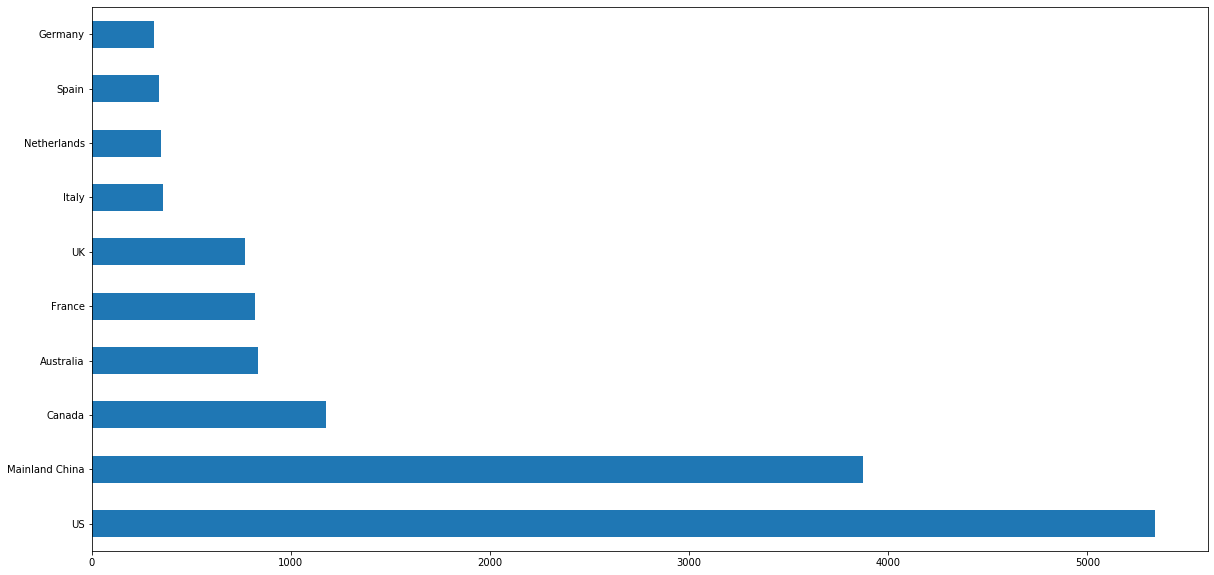

In [7]:
df['Country/Region'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

These are the top 10 countries affected by COVID-19. PLEASE NOTE: We will be using data of all the countries and not just the top 10 countries.

Next thing we're gonna do is so remove the extra rows by adding all the rows with have the same timestamp and country since many timestamps still show updates of provinces/states and not countires.

In [8]:
df=df.groupby(['ObservationDate','Country/Region'])['Confirmed','Deaths','Recovered'].sum().reset_index()
i= list(range(0,15841))
df["Index"]=i
df

C:\Users\Kalpit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Index
0,01/22/2020,Hong Kong,0.0,0.0,0.0,0
1,01/22/2020,Japan,2.0,0.0,0.0,1
2,01/22/2020,Macau,1.0,0.0,0.0,2
3,01/22/2020,Mainland China,547.0,17.0,28.0,3
4,01/22/2020,South Korea,1.0,0.0,0.0,4
...,...,...,...,...,...,...
15836,05/25/2020,West Bank and Gaza,423.0,3.0,357.0,15836
15837,05/25/2020,Western Sahara,9.0,0.0,6.0,15837
15838,05/25/2020,Yemen,233.0,44.0,10.0,15838
15839,05/25/2020,Zambia,920.0,7.0,336.0,15839


We currently have 15000 entries which show gives us timely updates of the Confirmed, Deaths and Recovered status of all the countries worldwide. PLEASE NOTE: This database was last updated on 25th May 2020.

## ONE HOT ENCODING
Before going to model development, one final thing we need to do is to convert the categorical data to variables since Strings won't fit in the linear regression model.

### COUNTRIES

In [9]:
countries= np.array(df['Country/Region'])
country_data = pd.DataFrame({'Country/Region': countries})
country_data=pd.get_dummies(country_data)
country_data["Index"]=i
country_data

,Country/Region_ Azerbaijan,"Country/Region_('St. Martin',)",Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,...,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory,Index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15836
15837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15837
15838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,15838
15839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,15839


### OBSEREVED DATE

In [10]:
dates= np.array(df['ObservationDate'])
date_data = pd.DataFrame({'ObservationDate': dates})
date_data=pd.get_dummies(date_data)
date_data["Index"]=i
date_data

,ObservationDate_01/22/2020,ObservationDate_01/23/2020,ObservationDate_01/24/2020,ObservationDate_01/25/2020,ObservationDate_01/26/2020,ObservationDate_01/27/2020,ObservationDate_01/28/2020,ObservationDate_01/29/2020,ObservationDate_01/30/2020,ObservationDate_01/31/2020,...,ObservationDate_05/17/2020,ObservationDate_05/18/2020,ObservationDate_05/19/2020,ObservationDate_05/20/2020,ObservationDate_05/21/2020,ObservationDate_05/22/2020,ObservationDate_05/23/2020,ObservationDate_05/24/2020,ObservationDate_05/25/2020,Index
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15836
15837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15837
15838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15838
15839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15839


Until now we have rearranged data, dropped not so important columns and have merged rows together as to get the accurate information and have finally dropped from 29000 rows to 15000 rows. It's time to start building our Model.

## MODEL DEVELOPMENT

Using the Observation Date, Country, Confirmed cases and Deaths, we are to predict Recovered cases in the recent and in the possible near future.

Let's start with the basics and use Observation Date, Country, Deaths and Confirmed cases seperately to fit a Linear Regression model.

## OBSERVATION DATE

In [11]:
X=df[['Recovered']]
Y=date_data
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

C:\Users\Kalpit\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.032938992662743326

### COUNTRY/REIGON

In [12]:
X=df[['Recovered']]
Y=country_data
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

C:\Users\Kalpit\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.03293899276135478

### CONFIRMED

In [13]:
X=df[['Confirmed']]
Y=df['Recovered']
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.6480792934908699

### DEATHS

In [14]:
X=df[['Deaths']]
Y=df['Recovered']
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.6045314463789304

Before moving further, lets combine all the dataframes together. Now the dataframe will look really confusing since till we a giant pile of 0s and 1s but if we are to look at the data properly or seperatly we can always scroll up.
We will be joining dataframes on the basis of index.

In [15]:
df_reg=df
df_reg= df_reg.merge(date_data,on='Index')
df_reg=df_reg.merge(country_data,on='Index')
df_reg.drop(['ObservationDate','Country/Region','Recovered'],axis=1, inplace=True)


This is the normal dataframe we had after tweaking the columns and rows.

In [16]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Index
0,01/22/2020,Hong Kong,0.0,0.0,0.0,0
1,01/22/2020,Japan,2.0,0.0,0.0,1
2,01/22/2020,Macau,1.0,0.0,0.0,2
3,01/22/2020,Mainland China,547.0,17.0,28.0,3
4,01/22/2020,South Korea,1.0,0.0,0.0,4
...,...,...,...,...,...,...
15836,05/25/2020,West Bank and Gaza,423.0,3.0,357.0,15836
15837,05/25/2020,Western Sahara,9.0,0.0,6.0,15837
15838,05/25/2020,Yemen,233.0,44.0,10.0,15838
15839,05/25/2020,Zambia,920.0,7.0,336.0,15839


This will be the dataframe that we are going to use for regression which contains only variables and no strings and is beyond our comprehension.

In [17]:
df_reg

,Confirmed,Deaths,Index,ObservationDate_01/22/2020,ObservationDate_01/23/2020,ObservationDate_01/24/2020,ObservationDate_01/25/2020,ObservationDate_01/26/2020,ObservationDate_01/27/2020,ObservationDate_01/28/2020,...,Country/Region_Uzbekistan,Country/Region_Vatican City,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,Country/Region_occupied Palestinian territory
0,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,547.0,17.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,423.0,3.0,15836,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15837,9.0,0.0,15837,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15838,233.0,44.0,15838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15839,920.0,7.0,15839,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
X= df_reg
Y = df['Recovered']
lm2 = LinearRegression()
lm2.fit(X,Y)
lm2.score(X, Y)

0.8056487335250285

## MODEL EVALUATION AND REFINEMENT

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### DATA SPLIT

In [20]:
X=df_reg
Y=df['Recovered']
x_train, x_test, y_train,y_test= train_test_split(X,Y,test_size=0.15,random_state=1)

In [21]:
from sklearn.linear_model import Ridge

In [22]:
Rig= Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

0.8353257554559118

We have an accuracy of 83% of predicting the recovered cases!